<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11692 entries, 0 to 11691
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    11692 non-null  object 
 1   StockCode    11692 non-null  object 
 2   Description  11650 non-null  object 
 3   Quantity     11691 non-null  float64
 4   InvoiceDate  11691 non-null  object 
 5   UnitPrice    11691 non-null  float64
 6   CustomerID   11691 non-null  float64
 7   Country      11691 non-null  object 
dtypes: float64(3), object(5)
memory usage: 730.9+ KB
Total revenue:  211357.3
Top 10 products by revenue: 
           Quantity  UnitPrice    Revenue
StockCode                                
22423         700.0     559.18  391426.00
85123A       1009.0     182.20  183839.80
84029E        840.0     184.26  154778.40
22086         744.0     181.82  135274.08
22866         780.0     150.75  117585.00
22632         706.0     150.70  106394.20
22910         568.0     166.

<ipython-input-1-8bad6491e7b8>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_revenue = df.groupby(["StockCode"])["Quantity", "UnitPrice"].sum()


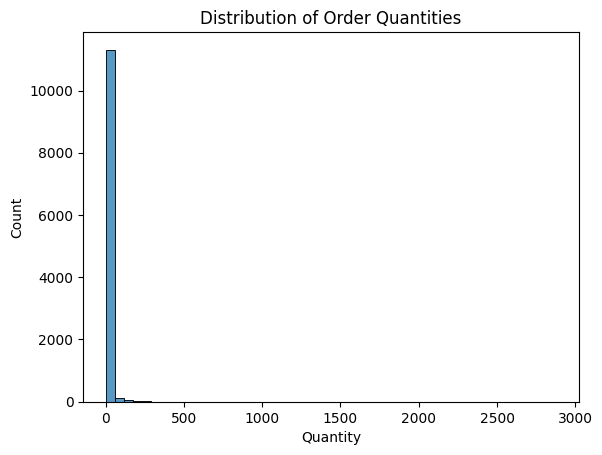

Number of unique customers:  324
Average order value:  463.5


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

# Perform EDA
df.head() # View the first few rows of the dataset
df.describe() # View some basic statistics of the numerical columns
df.info() # View information about the dataset, including data types and missing values

# Data cleaning and preprocessing
df = df.dropna() # Drop rows with missing values
df = df[df["Quantity"] > 0] # Keep only rows with positive Quantity values
df = df[df["UnitPrice"] > 0] # Keep only rows with positive UnitPrice values

# Exploratory Data Analysis (EDA)
# What is the total revenue generated by the online retail platform?
total_revenue = (df["Quantity"] * df["UnitPrice"]).sum()
print("Total revenue: ", round(total_revenue, 2))

# Question 2: What are the top 10 products by revenue?
product_revenue = df.groupby(["StockCode"])["Quantity", "UnitPrice"].sum()
product_revenue["Revenue"] = product_revenue["Quantity"] * product_revenue["UnitPrice"]
top_products = product_revenue.nlargest(10, "Revenue")
print("Top 10 products by revenue: ")
print(top_products)

# Question 3: What is the distribution of order quantities?
sns.histplot(df["Quantity"], bins=50)
plt.title("Distribution of Order Quantities")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

# How many unique customers are there in the dataset?
unique_customers = df["CustomerID"].nunique()
print("Number of unique customers: ", unique_customers)

# What is the average order value (AOV) for the online retail platform?
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]
aov = df.groupby(["InvoiceNo"])["TotalCost"].sum().mean()
print("Average order value: ", round(aov, 2))


Top 10 most popular products:
     StockCode                         Description  Quantity
1691     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS    3417.0
1824     84950      ASSORTED COLOUR T-LIGHT HOLDER    1860.0
660      21915              RED  HARMONICA IN BOX     1699.0
49      17084R               ASSORTED INCENSE PACK    1440.0
258      21137            BLACK RECORD COVER FRAME    1118.0
297      21212     PACK OF 72 RETROSPOT CAKE CASES    1111.0
1924    85123A  WHITE HANGING HEART T-LIGHT HOLDER    1009.0
1800     84879       ASSORTED COLOUR BIRD ORNAMENT     928.0
578      21791  VINTAGE HEADS AND TAILS CARD GAME      858.0
1681    84029E      RED WOOLLY HOTTIE WHITE HEART.     840.0


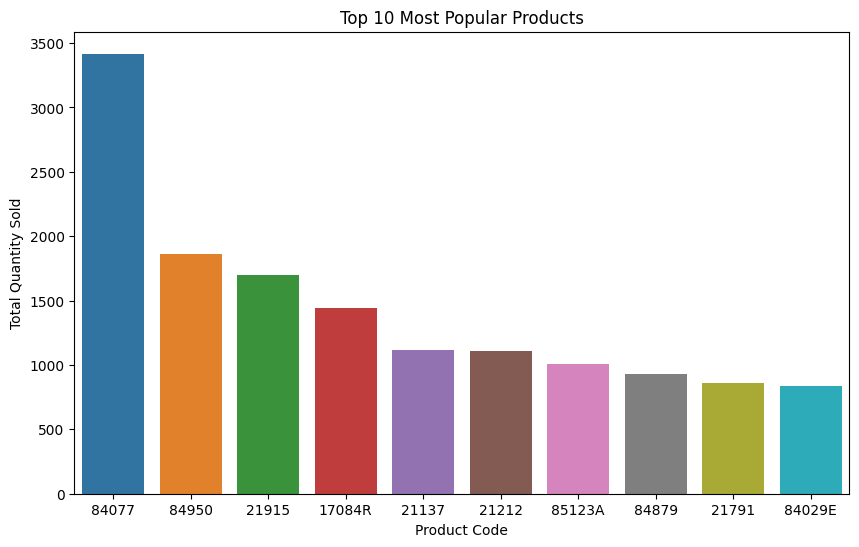

In [2]:
import seaborn as sns

# Top 10 most popular products
popularity = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print('Top 10 most popular products:')
print(popularity.head(10))

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='Quantity', data=popularity.head(10))
plt.xlabel('Product Code')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Most Popular Products')
plt.show()


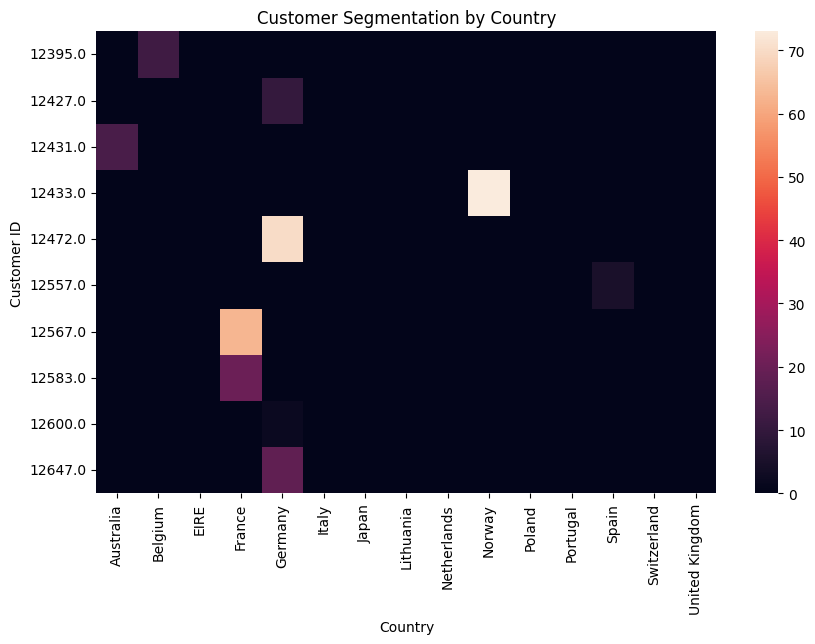

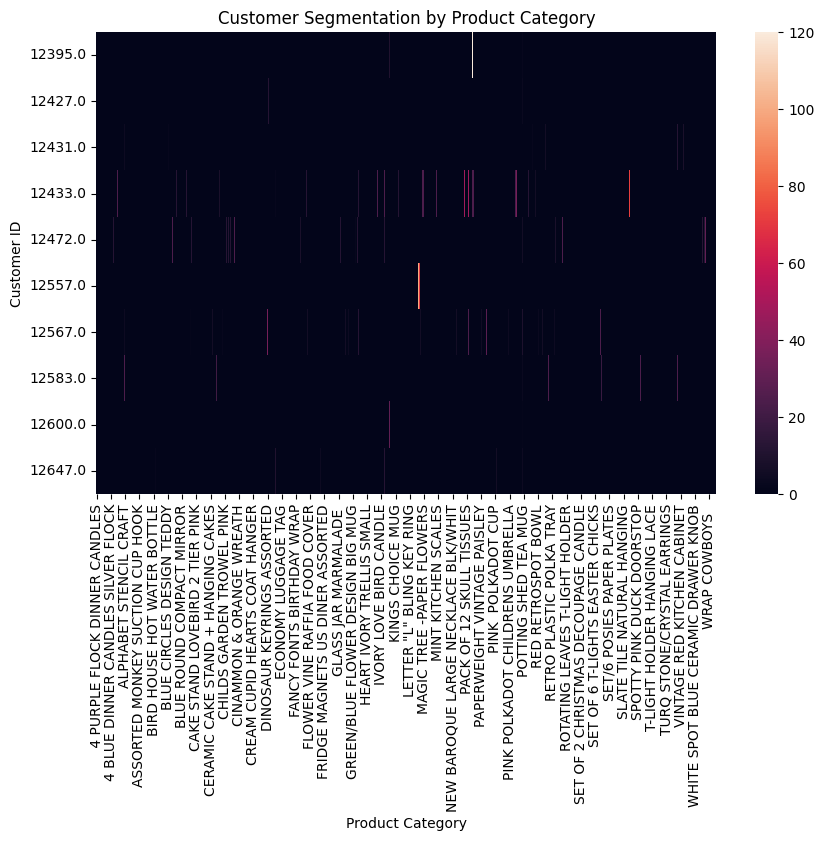

In [4]:
# Segmentation by Country
country_df = df.groupby(['Country', 'CustomerID'])['InvoiceNo'].count().reset_index()
country_df = country_df.pivot(index='CustomerID', columns='Country', values='InvoiceNo')
country_df = country_df.fillna(0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(country_df.head(10))
plt.xlabel('Country')
plt.ylabel('Customer ID')
plt.title('Customer Segmentation by Country')
plt.show()

# Segmentation by Product Category
category_df = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()
category_df = category_df.pivot(index='CustomerID', columns='Description', values='Quantity')
category_df = category_df.fillna(0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(category_df.head(10))
plt.xlabel('Product Category')
plt.ylabel('Customer ID')
plt.title('Customer Segmentation by Product Category')
plt.show()


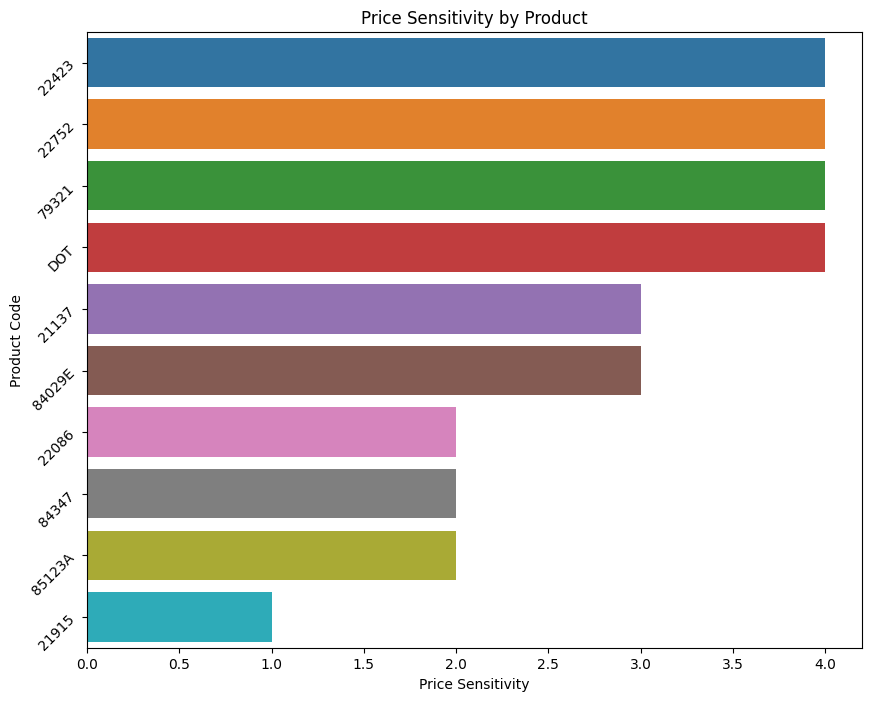

In [15]:
# Calculate revenue per product
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Calculate price sensitivity by product
price_sensitivity = df.groupby('StockCode')['UnitPrice'].mean().reset_index()
price_sensitivity['PriceSensitivity'] = pd.qcut(price_sensitivity['UnitPrice'], 5, labels=False)

# Merge price sensitivity with revenue data
revenue_data = df.groupby('StockCode')['Revenue'].sum().reset_index()
price_sensitivity = pd.merge(price_sensitivity, revenue_data, on='StockCode')

# Select the top 10 products by revenue
top_products = revenue_data.sort_values('Revenue', ascending=False).head(10)['StockCode']
price_sensitivity = price_sensitivity.loc[price_sensitivity['StockCode'].isin(top_products)]

# Plot price sensitivity by product
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='PriceSensitivity', y='StockCode', data=price_sensitivity.sort_values('PriceSensitivity', ascending=False))
plt.xlabel('Price Sensitivity')
plt.ylabel('Product Code')
plt.title('Price Sensitivity by Product')

# Rotate y-axis labels
plt.yticks(rotation=45)

plt.show()



Top 10 customers by lifetime value:
     CustomerID  TotalCost
142     15287.0   51418.20
133     15061.0    9407.34
72      13777.0    6585.16
290     17850.0    5391.21
202     16210.0    4738.54
191     16029.0    4271.52
261     17381.0    3603.72
40      13081.0    2366.78
128     14911.0    2283.53
227     16754.0    2002.40


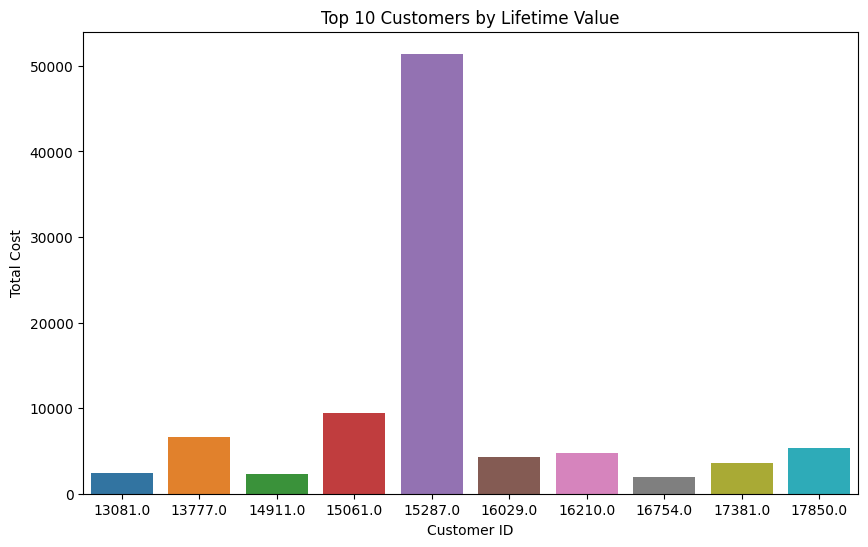

In [9]:
# Customer lifetime value
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
clv = df.groupby(['CustomerID'])['TotalCost'].sum().reset_index()
clv = clv.sort_values(by='TotalCost', ascending=False)
print('Top 10 customers by lifetime value:')
print(clv.head(10))

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalCost', data=clv.head(10))
plt.xlabel('Customer ID')
plt.ylabel('Total Cost')
plt.title('Top 10 Customers by Lifetime Value')
plt.show()
